<a href="https://colab.research.google.com/github/madhav2k22/disease/blob/main/vggmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

dataset_path = '/content/drive/MyDrive/web technology/archive/plantvillage/PlantVillage'


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=0.255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  )


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [ ]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 180,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 180,
    epochs=10
)

model.save('plant_disease_vgg16.h5')


Epoch 1/10
91/91 [==============================] - 2117s 23s/step - loss: 2.6531 - accuracy: 0.4945 - val_loss: 0.8589 - val_accuracy: 0.7188
Epoch 2/10
91/91 [==============================] - 2147s 24s/step - loss: 1.0725 - accuracy: 0.6868 - val_loss: 0.6600 - val_accuracy: 0.7869
Epoch 3/10
91/91 [==============================] - 2092s 23s/step - loss: 0.8432 - accuracy: 0.7368 - val_loss: 0.4894 - val_accuracy: 0.8366
Epoch 4/10
91/91 [==============================] - 2083s 23s/step - loss: 0.7943 - accuracy: 0.7597 - val_loss: 0.4891 - val_accuracy: 0.8352
Epoch 5/10
91/91 [==============================] - 2108s 23s/step - loss: 0.6351 - accuracy: 0.8145 - val_loss: 0.4847 - val_accuracy: 0.8494
Epoch 6/10
91/91 [==============================] - 2108s 23s/step - loss: 0.6208 - accuracy: 0.8022 - val_loss: 0.4359 - val_accuracy: 0.8665
Epoch 7/10
91/91 [==============================] - 2138s 23s/step - loss: 0.5965 - accuracy: 0.8214 - val_loss: 0.4076 - val_accuracy: 0.8665

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('plant_disease_vgg.keras')

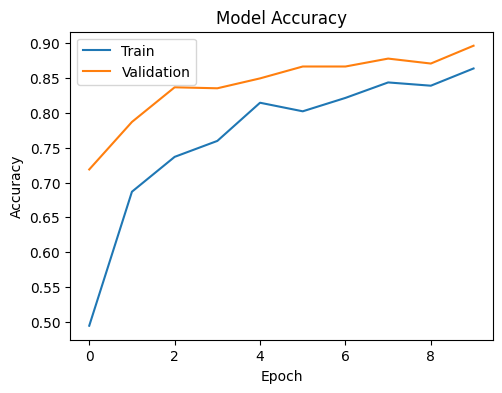

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

129/129 [==============================] - 2701s 21s/step


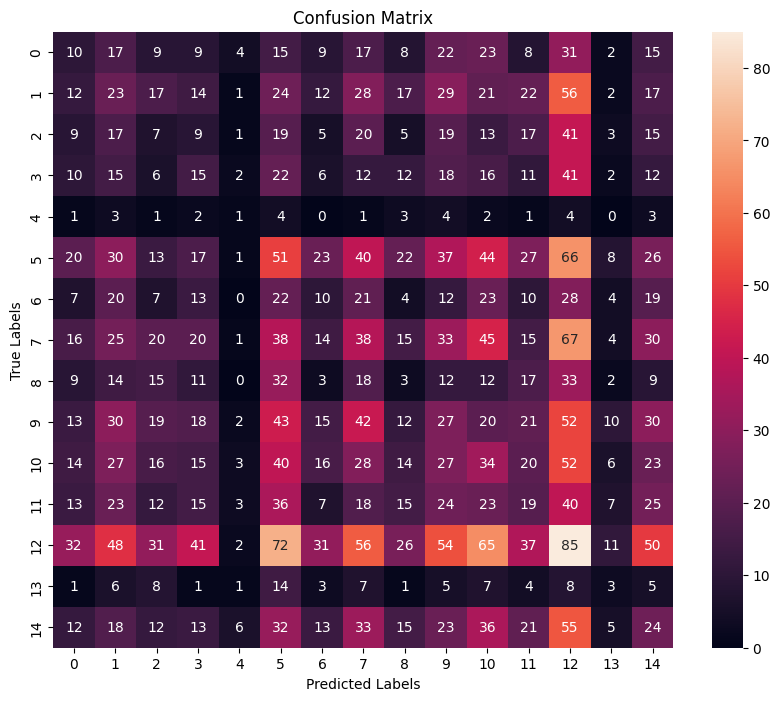

In [9]:
# prompt: code to find out the confusion matirix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true classes for the validation set
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


129/129 [==============================] - 2387s 18s/step


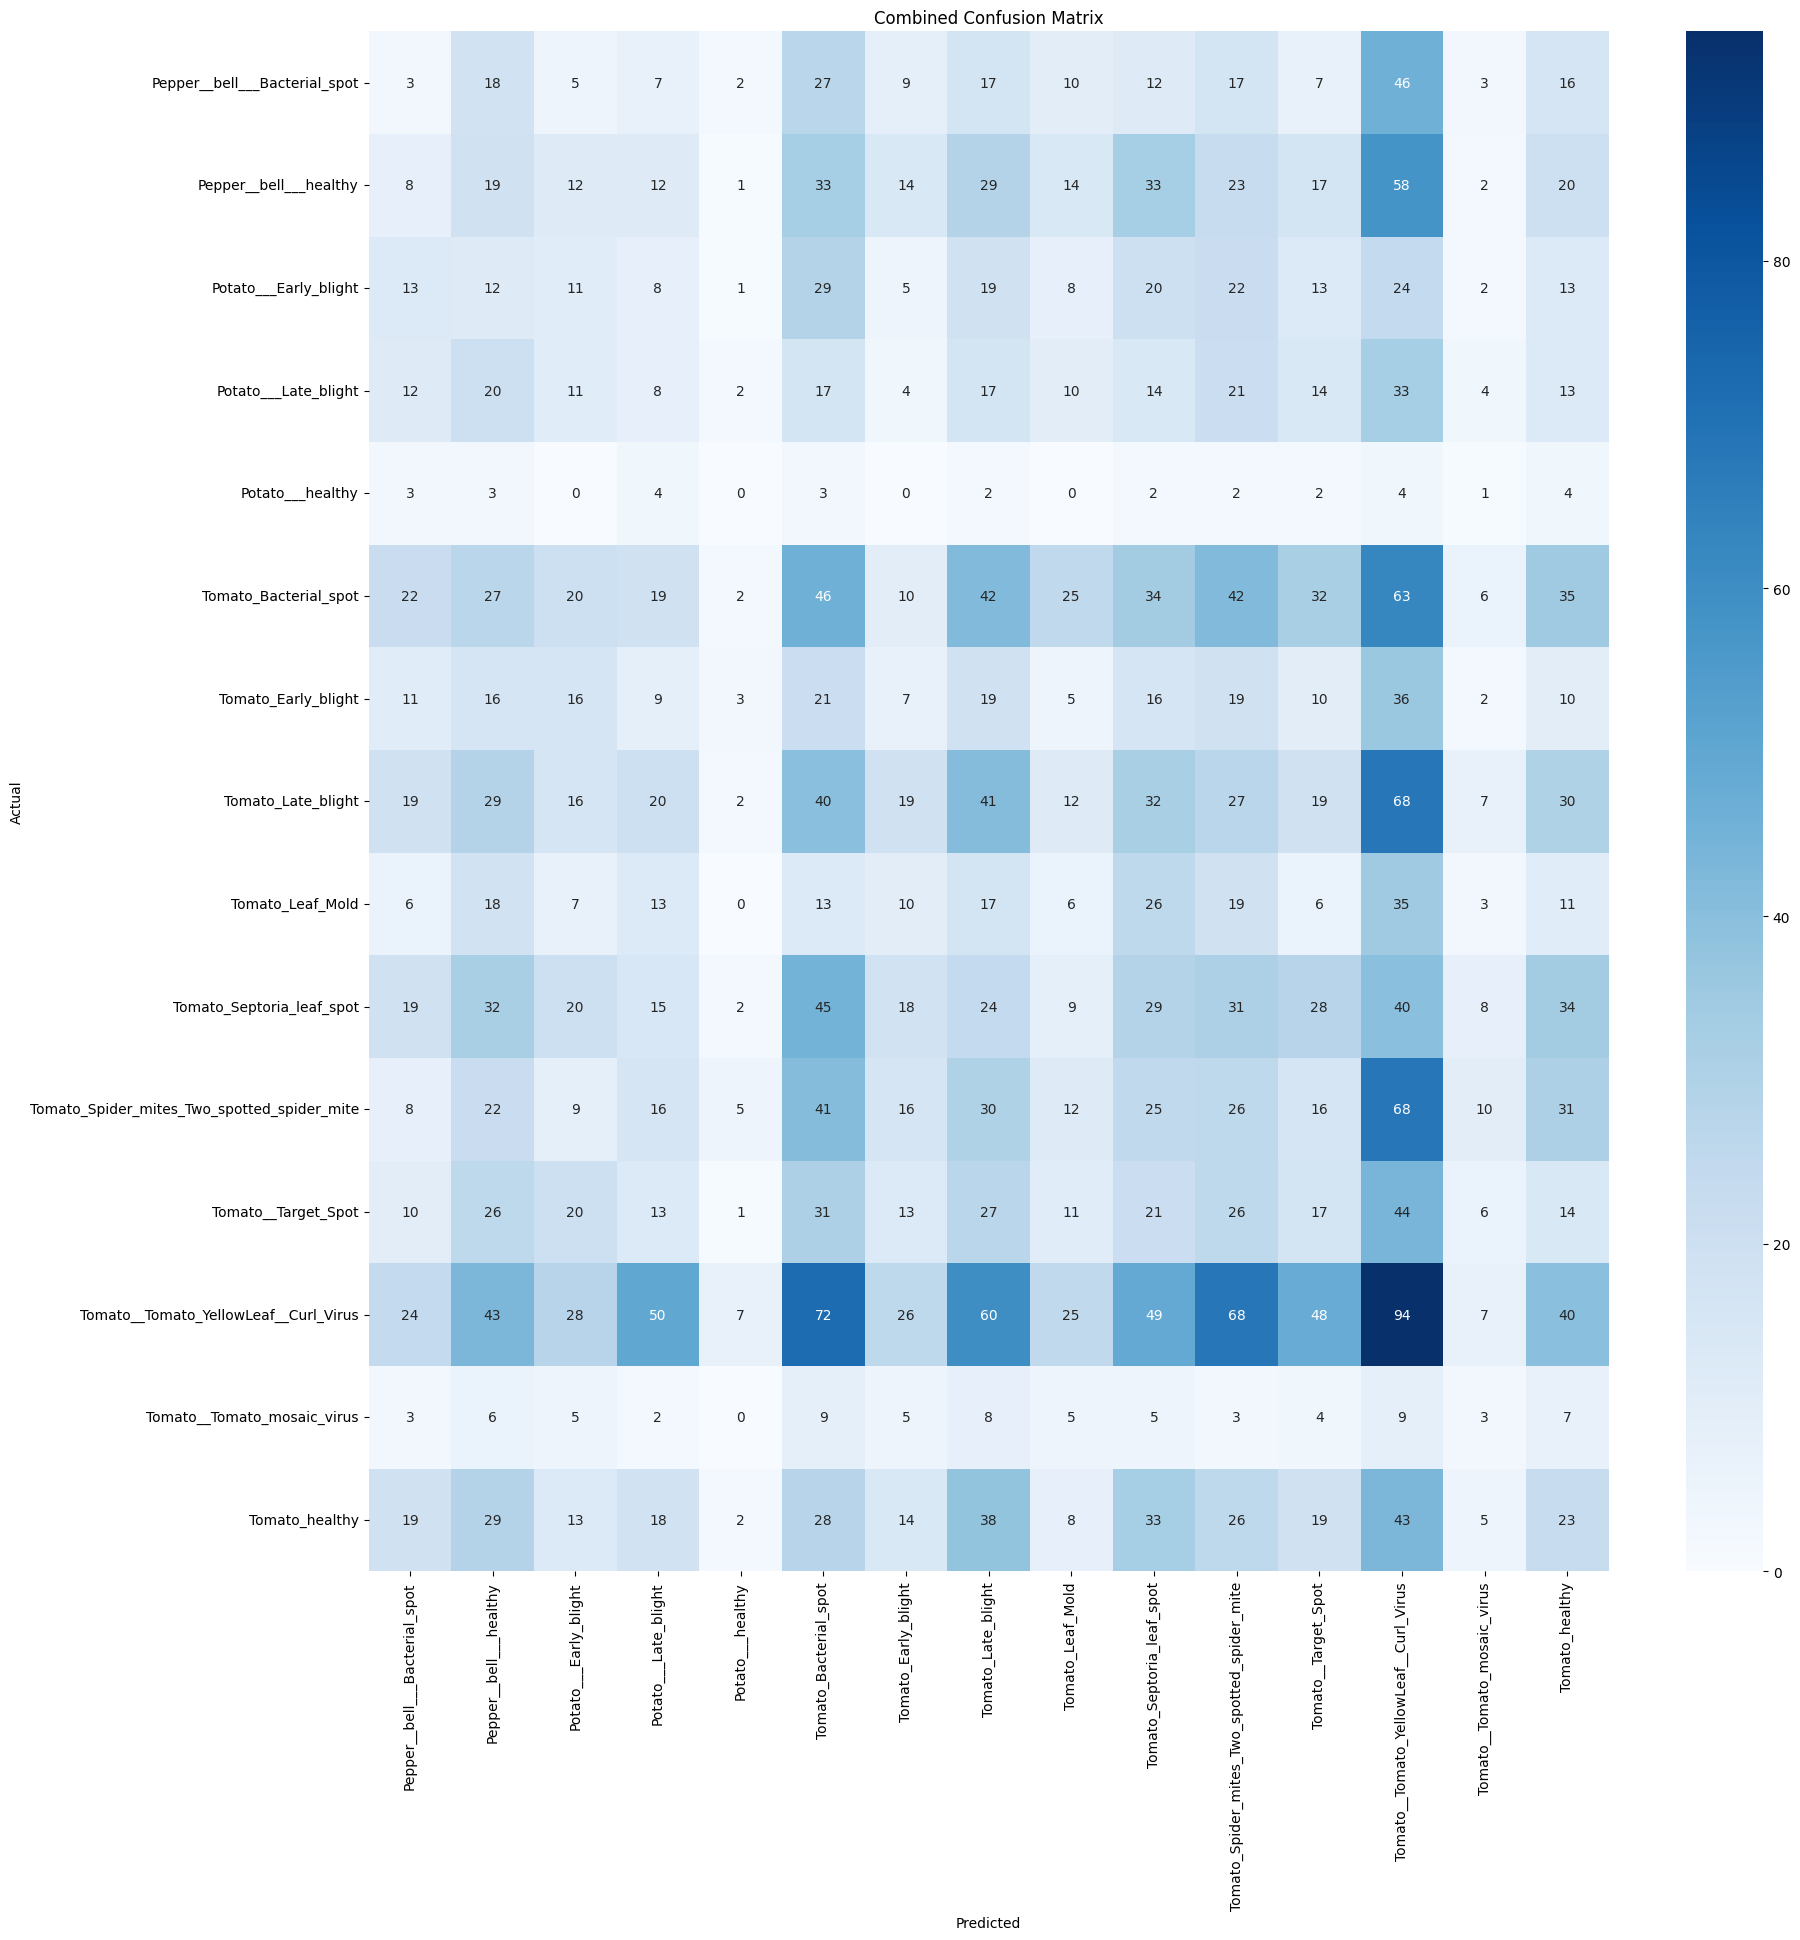

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Predict the probabilities for the validation data
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Combined Confusion Matrix')

# Save the plot as an image file
plt.savefig('combined_confusion_matrix.png')
plt.show()
